In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
from get_data import generate_csv
from data_manipulation import prune_data
from plotting import plot_percentage_returns

from compute_returns import * 


generate_csv()

1
Data already present


In [17]:
import yfinance as yf

# Define the ticker symbol for Vanguard LifeStrategy (example: 60% Equity fund in GBP)
ticker = "V80A"  # Replace with the correct ticker for your preferred LifeStrategy fund

# Download historical data
data = yf.download(ticker, interval="1d")

data


Failed to get ticker 'V80A' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['V80A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,V80A,V80A,V80A,V80A,V80A,V80A
Date,,,,,,


In [4]:
data = pd.read_csv('Historical_data.csv')

In [13]:
df = data.columns[1:].values
df = pd.DataFrame(df)
df.to_csv('Assets.csv')

In [4]:
ETFs = ['S%26P 500', 'MSCI Europe', 'MSCI Japan', 'MSCI Emerging Markets']

dates, data_ready = prune_data(data, ETFs)

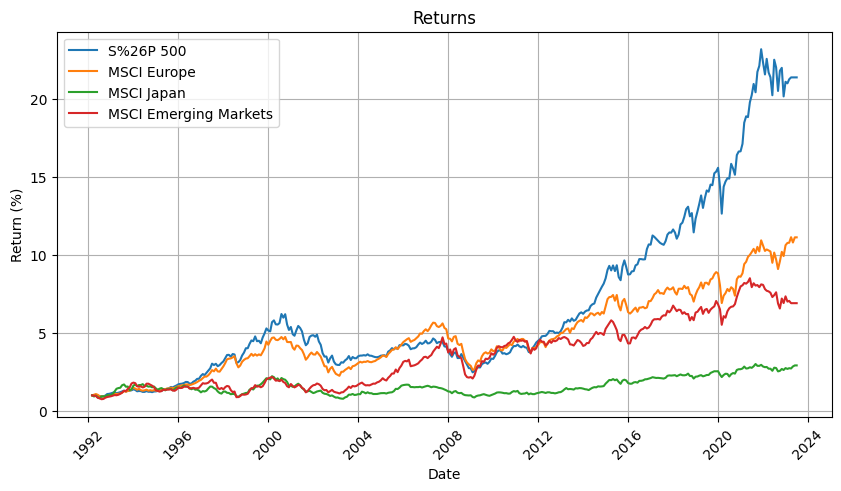

In [5]:
plot_percentage_returns(dates, data_ready)

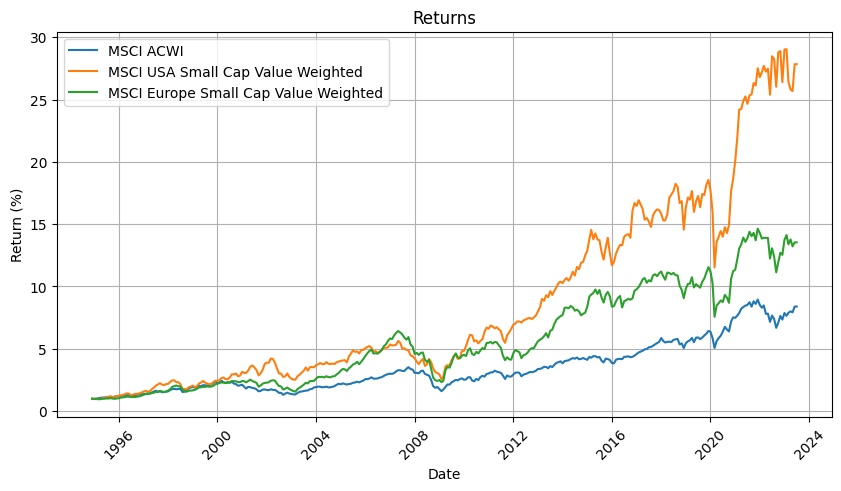

In [6]:
ETFs = ['MSCI ACWI', 'MSCI USA Small Cap Value Weighted', 'MSCI Europe Small Cap Value Weighted']
dates, data_ready = prune_data(data, ETFs)

plot_percentage_returns(*prune_data(data, ETFs))

In [8]:
porfolios = [
                [100,0,0],
                [90,5,5],
                [80,10,10]
]

results = compute_portfolio_returns_multi(dates, data_ready, ETFs, porfolios, years=20)

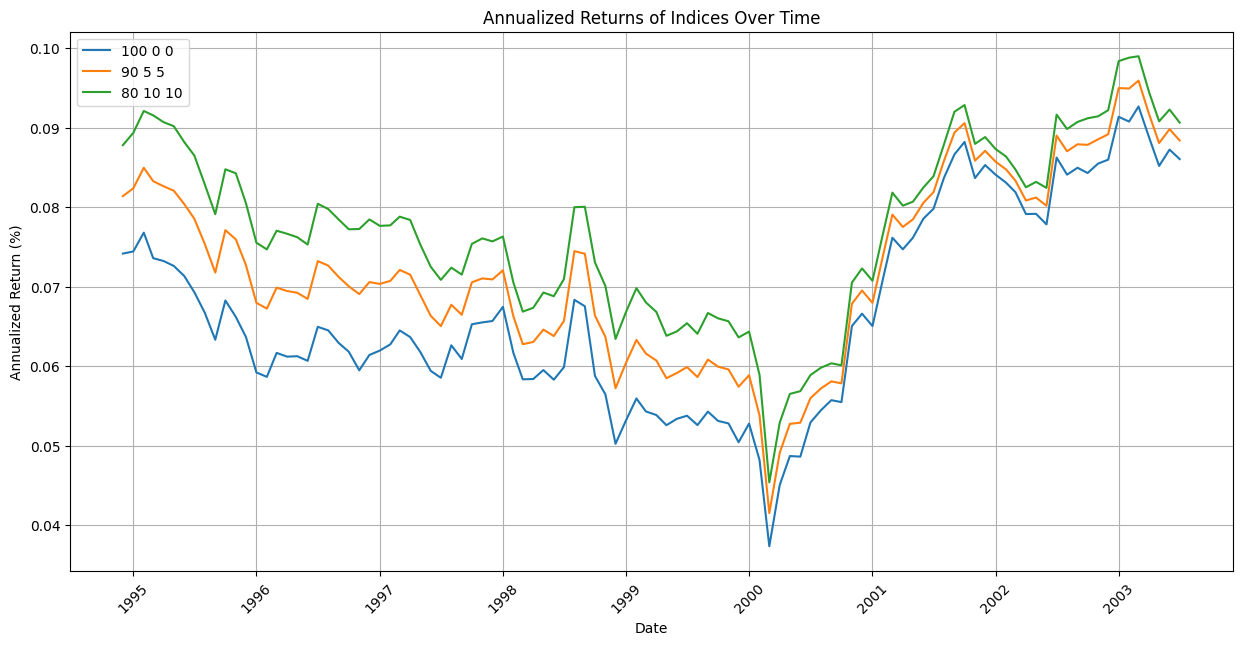

In [9]:
df = pd.DataFrame(results)

# Set Date as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot
plt.figure(figsize=(15, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Annualized Return (%)")
plt.title("Annualized Returns of Indices Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

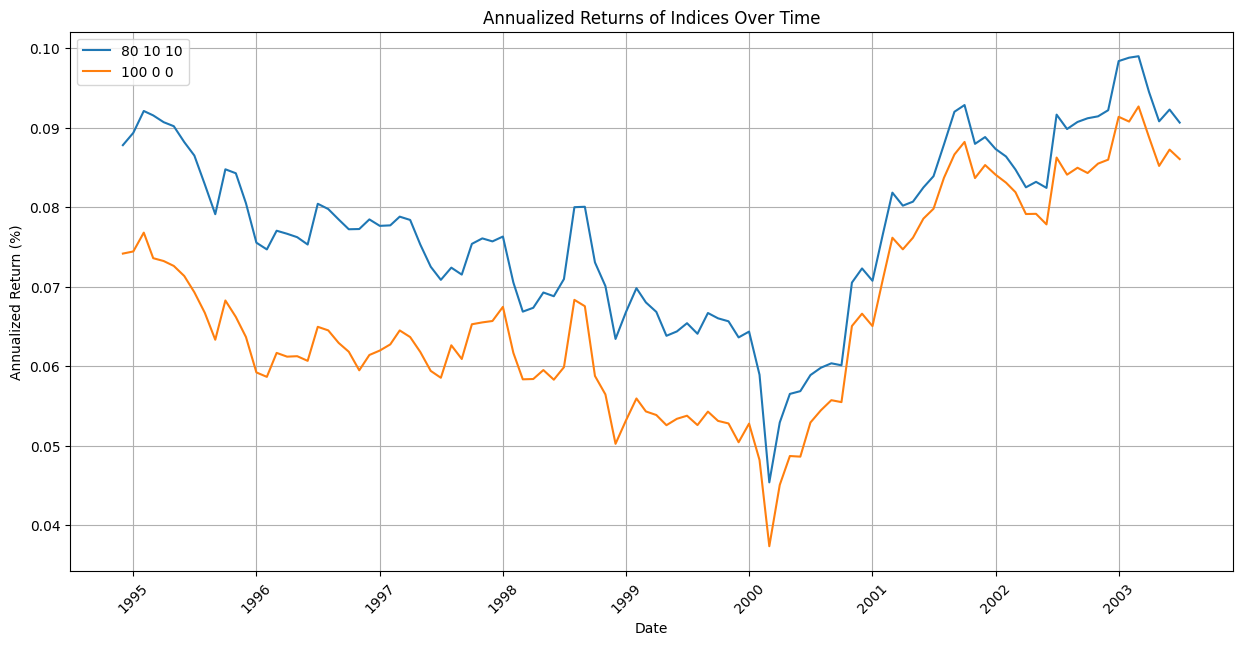

In [23]:
results = compute_portfolio_returns(data_ready, ETFs, [70,10,5,5], years=5)
results = pd.concat([dates, results], axis=1)
results

,Date,70 10 5 5
289,1992-03,0.170644
290,1992-04,0.178994
291,1992-05,0.193657
292,1992-06,0.219752
293,1992-07,0.247802
...,...,...
661,2023-03,NaN
662,2023-04,NaN
663,2023-05,NaN
664,2023-06,NaN


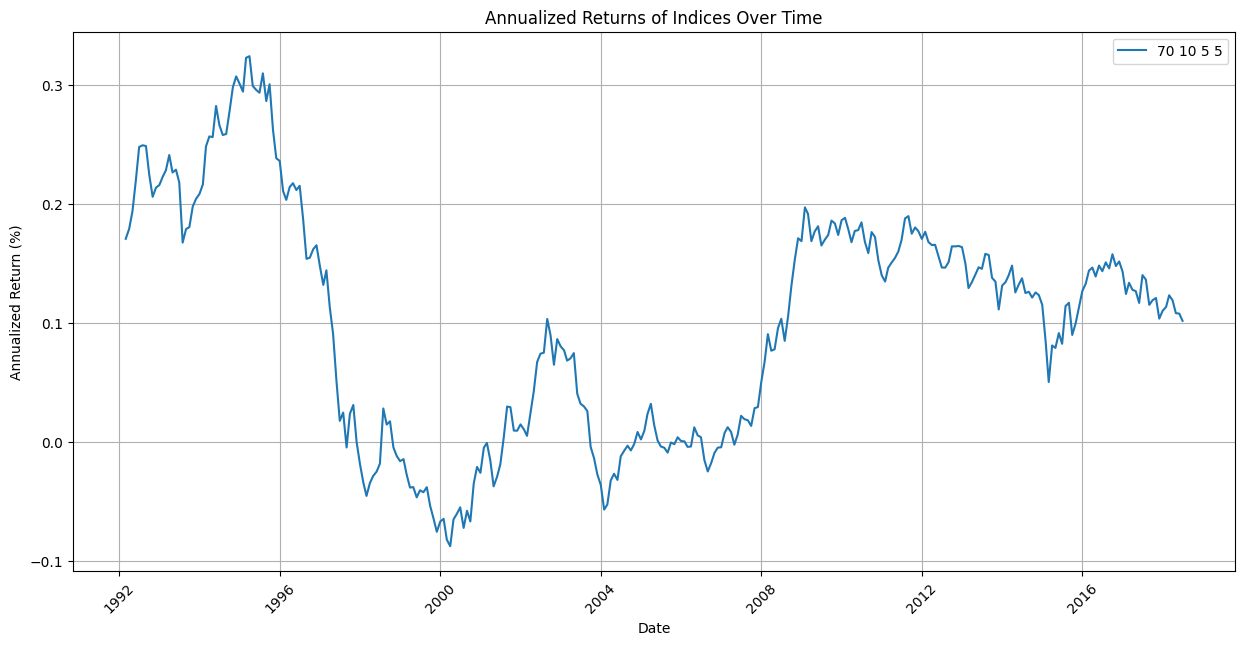

In [21]:
df = pd.DataFrame(results)

# Set Date as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot
plt.figure(figsize=(15, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Annualized Return (%)")
plt.title("Annualized Returns of Indices Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
results_to_plot = pd.concat([dates, results], axis=1)
df = pd.DataFrame(results_to_plot)

# Set Date as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot
plt.figure(figsize=(15, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Annualized Return (%)")
plt.title("Annualized Returns of Indices Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [17]:
results.describe()

,100
count,284.000000
mean,0.069315
std,0.060051
min,-0.054181
25%,0.020941
50%,0.070310
75%,0.113739
max,0.210223


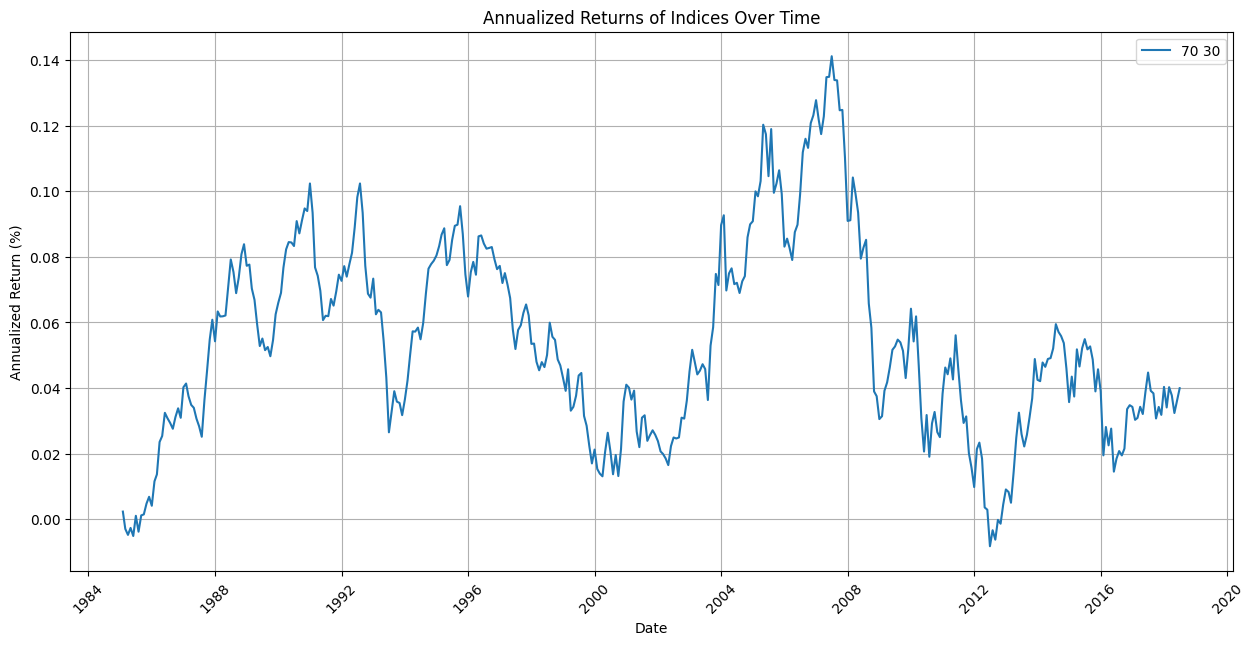

In [59]:
results_to_plot = pd.concat([dates, results], axis=1)
df = pd.DataFrame(results_to_plot)

# Set Date as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot
plt.figure(figsize=(15, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Annualized Return (%)")
plt.title("Annualized Returns of Indices Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

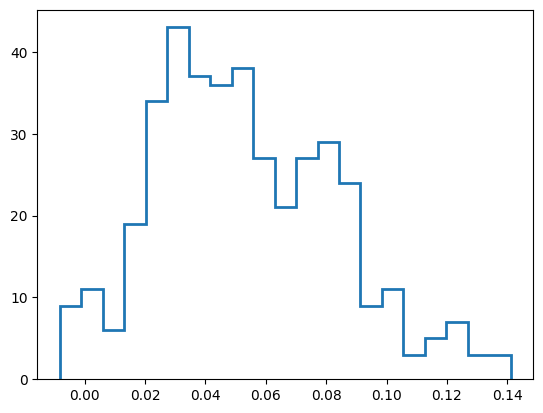

In [60]:
_ = plt.hist(results, bins=21, histtype='step', lw=2)

<Axes: ylabel='Frequency'>

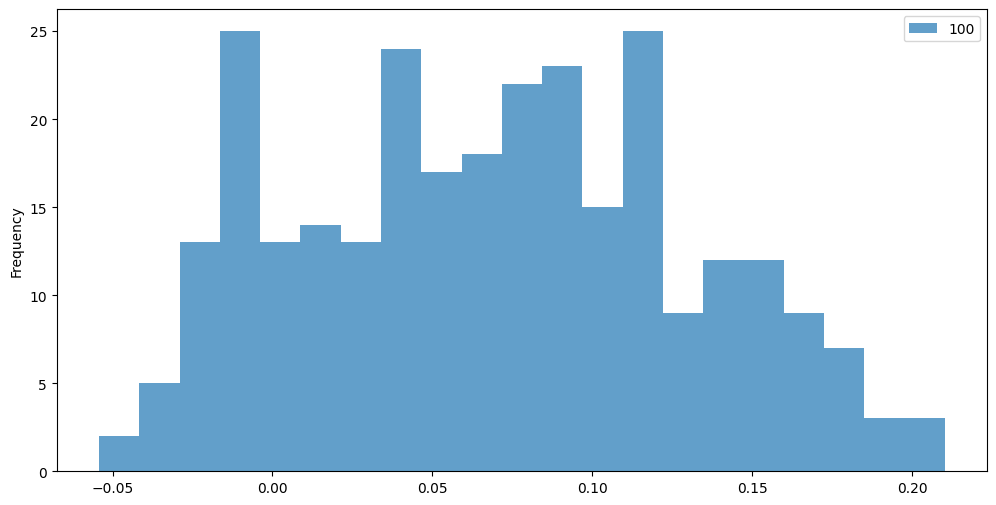

In [31]:
results.plot(kind="hist",bins=21,alpha=0.7,figsize=(12,6)) 